<a href="https://colab.research.google.com/github/MaschinenNah/MLCdV_02_01_PythonBasics/blob/main/02_02_NumpyUndPyPlot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


##**Numpy und PyPlot**

###**NumPy**



---


####**Wozu NumPy?**

Zur Erinnerung: Python-Listen können Elemente verschiedener Typen speichern:


In [ ]:
wilde_mischung = [3.14, 17, "guten Tag", [1,2,3]]

Es ist erlaubt, Elemente beliebig zu tauschen und übrigens auch anzuhängen:

In [ ]:
wilde_mischung[0] = "bla"
wilde_mischung.append(42)
print(wilde_mischung)

Diese Flexibilität hat viele Vorteile. Aber: wenn es darum geht, etwa beim maschinellen Lernen Berechnungen mit hunderttausenden oder gar Millionen von Werte zu durchzuführen, dann ist es wesentlich besser, dem Prozessor mitzuteilen: Jetzt kommen genau eine Millionen Werte vom Typ X. Das Programm kann unter Umständen dann 50 Mal schneller laufen, als mit den flexiblen Listen.

Um dies zu gewährleisten, gibt es das Modul `numpy` und die zugehörigen **NumPy-Arrays**. Im folgenden werden wir immer von Arrays sprechen, wenn wir NumPy-Arrays meinen, im Gegensatz zu Listen.

NumPy steht übrigens für **Numerisches Python**.

Es ist üblich, das Modul wie folgt zu importieren:

In [ ]:
import numpy as np

Wir zeigen zunächst eine Methode, um ein Array zu erzeugen:

`arange()` mit einem ganzzahligen Argument `n` liefert ein Array mit `n` ganzzahligen Elementen von `0` bis `n`:

In [ ]:
arr = np.arange(9)
arr



---


####**Form und Typ eines NumPy-Arrays**

Arrays haben zwei entscheidende Eigenschaften: **`shape`** und **`dtype`**.

`shape` beschreibt die Form des Arrays: Wie viele Dimensionen hat das Array, und welche Ausdehnung hat die jeweilige Dimension? `shape` ist vom Typ `tupel`.

In dem gegebenen Fall hat arr eine Dimension, die eine Ausdehnung von 9 Elementen hat. Das Komma steht da, um deutlich zu machen, dass es sich nicht um eine 9 in einer Klammer handelt, sondern um ein einstelliges Tupel.


In [ ]:
arr.shape

dtype beschreibt den Typ des Arrays. Denn: Arrays dürfen nur Elemente eines einzigen Typs enthalten, um den beschriebenen Geschwindigkeitsvorteil zu gewährleisten.

In diesem Fall hat `arange()` - also die Funktion, die das Array erzeugt hat - automatisch den Typ auf `int64` gesetzt. Die 64 steht hier für 64 Bit, das ist die Anzahl an Bits (Nullen und Einsen), die ein einzelner Wert im Speicher verbraucht:

In [ ]:
arr.dtype

Bei allen Funktionen, die Arrays erzeugen, ist es möglich, per Schlüsselwortargument den Typ explizit zu bestimmen. uint8 steht hier für 8 Bit ohne Vorzeichen. Ein Wert vom Typ `uint8` kann Zahlen von 0-255 repräsentieren.

Es ist immer geboten, den kleinsten geeigneten Datentyp für die jeweilige Aufgabe zu wählen, um Zeit und Speicher zu sparen.

In [ ]:
arr = np.arange(9, dtype='uint8')
arr

`float16` steht für eine Fließkommazahl mit 16 Bit:

In [ ]:
arr_float = np.arange(9, dtype='float16')
arr_float

Mit der Funktion `astype()` lassen sich (sofern grundsätzlich möglich) Arrays eines anderen Typs herstellen:

In [ ]:
arr_uint8 = arr_float.astype('uint8')
arr_uint8

Der Typ und die Anzahl der Elemente eines Arrays kann nach der Erzeugung im Normalfall nicht geändert werden. Es ist allerdings erlaubt - und in vielen Fällen sinnvoll und notwendig - die Form (=`shape`) zu modifizieren. Das erledigt die Funktion `reshape()`. Das Argument von Reshape ist ein Tupel mit der gewünschten neuen Dimension. Bedingung hierfür ist, dass die Anzahl der Elemente dabei konstant bleibt.

Das folgende Beispiel macht aus dem eindimensionalen `arr` mit 9 Elementen ein zweidimensionales mit 3 mal 3 Elementen. `print()` liefert übrigens eine etwas schönere Darstellung des Arrays:

In [ ]:
arr = arr.reshape((3,3))
print(arr)

In [ ]:
arr.shape

Es ist möglich, und beim maschinellen Lernen manchmal nötig, eine "flache" Dimension hinzuzufügen. Nach der Ausführung des folgenden Codes hat `arr` drei Dimensionen (statt vorher zwei) - Die Anzahl der Elemente des Arrays bleibt aber konstant.

In [ ]:
arr = arr.reshape((3,3,1))
print(arr)

In [ ]:
arr.shape

Ein weiteres Beispiel für die Erzeugung und Umformung eines Arrays. Wir gehen in drei Schritten von eindimensional nach dreidimensional:

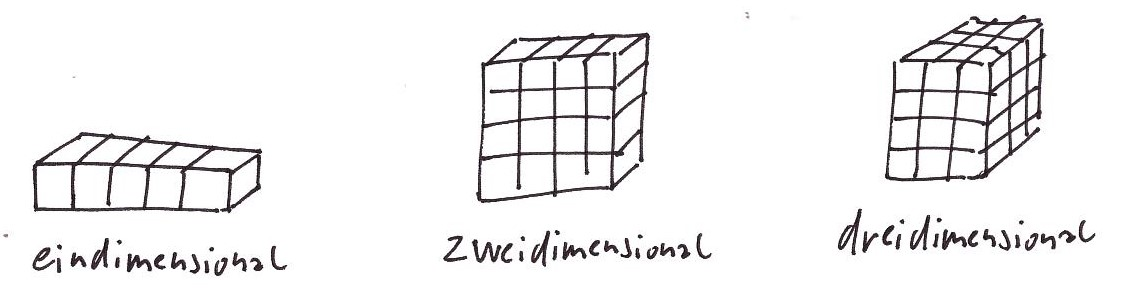

In [ ]:
arr_1D = np.arange(27)
print(arr_1D)

In [ ]:
arr_2D = arr_1D.reshape((3,9))
print(arr_2D)

In [ ]:
arr_3D = arr_1D.reshape((3,3,3))
print(arr_3D)



---


####**Elemente auswählen, Teilbereiche ausschneiden**

Die Auswahl einzelner Elemente eines Arrays läuft ähnlich wie bei den Listen:

In [ ]:
arr_3D[1]

In [ ]:
arr_3D[1,1]

In [ ]:
arr_3D[1,1,1]

Auch die Slice- oder Teilbereichsoperatoren lassen sich auf Arrays anwenden:

In [ ]:
arr = np.arange(36).reshape((6,6))
print(arr)

In [ ]:
ausschnitt = arr[2:4,2:4]
print(ausschnitt)

Auch das Ersetzen von Teilbereichen ist erlaubt:

In [ ]:
arr[2:4,2:4] = np.zeros((2,2))
print(arr)



---


####**Weitere Funktionen zur Erzeugung von NumPy Arrays**

Hier zeigen wir noch einige wichtige Funktionen zur Erzeugung von Arrays.

np.zeros() liefert ein mit Nullen gefülltes Array. Ein Argument bestimmt die Form (=shape). Sofern der Typ nicht näher bestimmt wird, ist das Ergebnis vom Typ 'float64':



In [ ]:
arr = np.zeros((3,3))
print(arr)
print(arr.dtype)

So bekommen wir ein Array vom Typ 'uint8':

In [ ]:
arr = np.zeros((3,3), dtype='uint8')
print(arr)
print(arr.dtype)

Die Funktion `np.ones()` funktioniert analog, nur mit Einsen statt Nullen:

In [ ]:
arr = np.ones((3,3), dtype='uint8')
print(arr)
print(arr.dtype)

`np.empty()` liefert ein nicht initalisiertes Array. Oft ist das Array mit Nullen oder Einsen gefüllt, aber wir können uns darauf nicht verlassen.

In [ ]:
arr = np.empty((3,3))
print(arr)
print(arr.dtype)

`np.random.random()` ein mit Zufallszahlen zwischen 0 und 1 gefülltes Array:

In [ ]:
arr = np.random.random((3,3))
print(arr)

Es ist auch möglich, gewöhnliche Listen in Arrays zu verwandeln. Dafür nutzen wir die Funktion `np.ndarray()`.

In [ ]:
arr = np.array([1,2,3,1,2,3])
print(arr)



---


####**Rechnen mit Arrays**

"Rechnen mit Numpy Arrays" wäre ein Thema für ein eigenes Buch. Dieser Abschnitt zeigt kommentarlos ein paar Beispiele:

In [ ]:
arr = np.arange(3)
print(arr)
# => [0 1 2]

arr2 = arr + 1
print(arr2)
# => [1 2 3]

arr3 = arr * 3
print(arr3)
# => [0 3 6]

In [ ]:
arr = np.arange(9).reshape((3,3))
arr2 = arr * 3
print(arr2)

In [ ]:
arr1 = np.arange(6)
arr2 = np.arange(6)
arr3 = arr1 * arr2
print(arr3)

In [ ]:
arr1 = np.arange(4).reshape((2,2))
print(arr1)
arr2 = np.arange(4).reshape((2,2))
print(arr2)
arr3 = arr1.dot(arr2)
print(arr3)



---

###**PyPlot**

Das Modul `matplotlib.pyplot` bietet eine Fülle von Funktionen zur grafischen Darstellung. Es wird üblicherweise wie folgt geladen:

In [ ]:
import matplotlib.pyplot as plt

PyPlot kann zum Beispiel Zahlenfolgen als Kurve darstellen:

In [ ]:
zahlen =  np.random.random((10))
plt.plot(zahlen)

Oder gleich fünf?



In [ ]:
zahlen =  np.random.random((10,5))
plt.plot(zahlen) 

Wir werden in unseren Machine-Learning Projekten PyPlot erst einmal ausschließlich dafür verwenden, um Arrays darzustellen, die Bilder (also Pixel und deren Farbwerte) repräsentieren.

Im folgenden Beispiel erzeugen wir das Array `bild` (5 * 5 Zufallswerte zwischen 0 und 1) und interpretieren es als Schwarzweißbild. Die Darstellung erledigt die Funktion `plt.imshow()`. Mittels des Arguments `cmap` stellen wir die Darstellung auf Schwarzweiß ein.


In [ ]:
bild = np.random.random((5,5))
plt.imshow(bild, cmap='gray')

Die Werte der einzelnen Pixel sind im Bereich zwischen 0 und 1. Genau so erwartet es plt.imshow(). Mittels der Argumente vmin und vmax können wir aber den Wertebereich verändern. Im folgenden Beispiel setzen wir ihn auf 0 bis 2. Im Ergebnis wird das "Bild" dunkler dargestellt:

In [ ]:
plt.imshow(bild, cmap='gray', vmin=0, vmax=2)

Im folgenden Beispiel steht die dritte Dimension in `np.random.random((5,5,3))` für die drei Farbkanäle:

In [ ]:
bild = np.random.random((5,5,3))
plt.imshow(bild)

PyPlot bietet eine kaum überschaubare Fülle an Darstellungsoptionen (Bildunterschriften, Achsenbeschriftungen, Zusammenfassung mehrerer Plots in einem Bild...) - Wir belassen es an dieser Stelle dabei und führen benötigte Optionen später bei Bedarf ein.



---


###**PyPlot und NumPy gemeinsam in Aktion**



Zur Veranschaulichung zeigen wir NumPy und PyPlot im Zusammenspiel.

Dieser Code lädt zwei Bilddateien von Wikimedia Commons in das Dateisystem des Jupyter Notebooks:

In [ ]:
import urllib.request

link1 = "https://upload.wikimedia.org/wikipedia/commons/thumb/4/49/Science_museum_025_adjusted.jpg/800px-Science_museum_025_adjusted.jpg"
link2 = "https://upload.wikimedia.org/wikipedia/commons/thumb/4/42/Osram_Factory_1931.jpg/800px-Osram_Factory_1931.jpg"

urllib.request.urlretrieve(link1, "computer.jpg");
urllib.request.urlretrieve(link2, "factory.jpg");

Wir benötigen aus dem Modul `keras.preprocessing.image` die Funktionen `load_image()` zum laden der Bilddateien und `img_to_array()` zum Umwandeln der Bilder in NumPy-Arrays:

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

In vier Zeilen laden wir das Bild des Computers, wandeln es in ein Numpy-Array um, normieren die Werte der Pixel auf den Bereich 0-1 (statt vorher 0-255) und stellen das Bild mit `imshow()` dar.

In [ ]:
# Bilddatei laden und unter img speichern:
img = load_img("computer.jpg")
# In Array umwandeln:
computer = img_to_array(img)
# Auf Wertebereich 0-1 normieren:
computer = computer / 255.0
# Array als Bild anzeigen:
plt.imshow(computer)

`computer` ist ein ganz normales Array. Die Form (=shape) beschreibt hier die Höhe (600 Pixel), die Breite (800 Pixel) und die Anzahl der Farbkanäle (3 für rot, grün und blau):

In [ ]:
print(computer.shape)

Wie gehabt laden wir ein zweites Bild, ein Photo der alten Osram Fabrik, in ein Array:

In [ ]:
img = load_img("factory.jpg")
fabrik = img_to_array(img)
fabrik = fabrik / 255.0
plt.imshow(fabrik)

Wir können mit NumPy und den Teilbereichsoperatoren im Handumdrehen einfache Photomontagen machen.

Schritt 1: Die Koordinaten des Ausschnitts finden, der die Bildröhre des Computers auswählt:

In [ ]:
ausschnitt = computer[110:290, 290:550]
plt.imshow(ausschnitt)

Schritt 2: Einen entsprechend großen Ausschnitt aus dem Fabrikbild ausschneiden:

In [ ]:
ausschnitt2 = fabrik[110:290, 290:550]
plt.imshow(ausschnitt2)

Schritt 3: Einfügen von `ausschnitt2` in das Bild/Array `computer`!

In [ ]:
computer[110:290, 290:550] = ausschnitt2
plt.imshow(computer)